# Downloading CAISO Data

This notebook walk through how to use `isodata` to access to the data availabe on [OASIS](http://oasis.caiso.com/).

While we will be using CAISO in this example, but most of this API will also work with all other ISOs.

In [1]:
import isodata
import pandas as pd
import plotly.express as px

In [2]:
caiso = isodata.CAISO()

let's also define a method to make it easier to name our files

In [5]:
folder = "../../archived_iso_data/caiso/"
def make_filename(name, start, end):
    return f"{name}_{start.strftime('%Y-%m-%d')}_{end.strftime('%Y-%m-%d')}.csv" 

## Historical Fuel Mix

In [6]:
start = pd.Timestamp("April 10, 2018").normalize()
end = pd.Timestamp.now().normalize()

mix_df = caiso.get_historical_fuel_mix(start, end=end, verbose=False)

mix_df.to_csv(make_filename(folder+"fuel_mix", start, end), index=None)

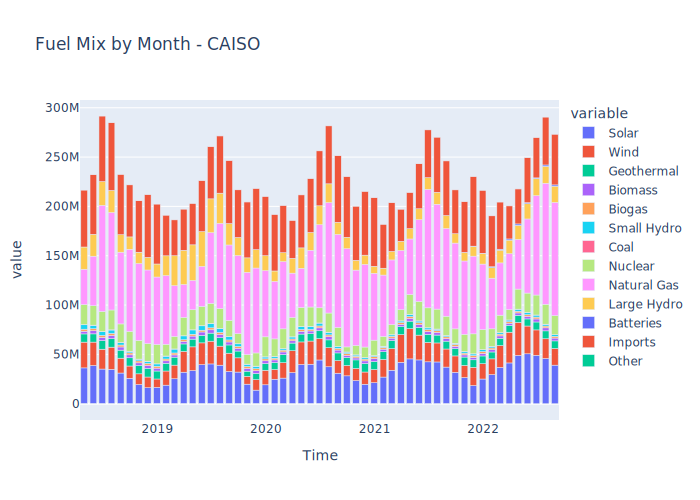

In [21]:
monthly_mix = mix_df.set_index("Time").resample("MS").sum().reset_index()[1:-1]
fig = px.bar(monthly_mix, x="Time", y=monthly_mix.columns[1:], title="Fuel Mix by Month - CAISO")
fig.show("svg")

## Historical Load 

In [20]:
start = pd.Timestamp("April 10, 2018").normalize()
end = pd.Timestamp.now().normalize()

load_df = caiso.get_historical_load(start, end=end, verbose=False)

load_df.to_csv(make_filename(folder+"load", start, end), index=None)

100%|███████████████████████████████████████| 1659/1659 [12:25<00:00,  2.23it/s]


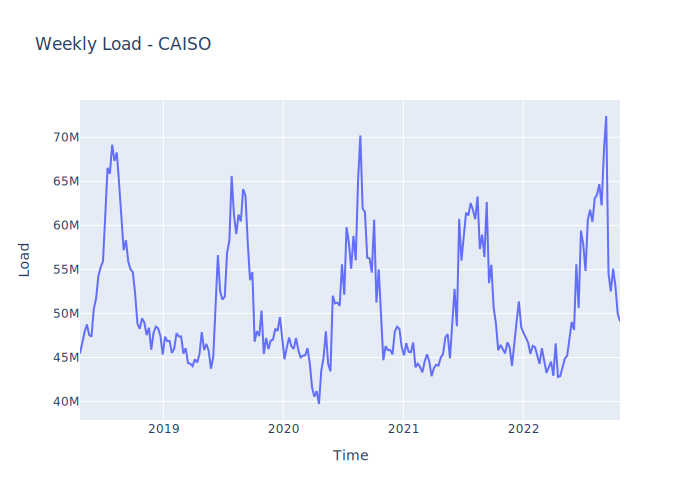

In [28]:
daily_load = load_df.set_index("Time").resample("W").sum().reset_index()[1:-1]
fig = px.line(daily_load, x="Time", y="Load", title="Weekly Load - CAISO")
fig.show("svg")

## Historical Locational Marginal Pricing (LMP)

You can supply whatever nodes or market you'd like, but for now let's download data for 3 trading hubs in the Day Head Hourly Market

In [29]:
start = pd.Timestamp("Jan 01, 2022").normalize()
end = pd.Timestamp.now().normalize()

locations = ['TH_NP15_GEN-APND', 'TH_SP15_GEN-APND', 'TH_ZP26_GEN-APND']

lmp_df = caiso.get_historical_lmp(start=start,  
                                  end=end,
                                  market='DAY_AHEAD_HOURLY', 
                                  locations=locations, 
                                  sleep=5)

lmp_df.to_csv(make_filename(folder+"dam_lmp", start, end), index=None)

100%|███████████████████████████████████████████| 10/10 [03:38<00:00, 21.84s/it]


In [31]:
lmp_df

LMP_TYPE                      Time            Market          Location  \
0        2022-01-01 00:00:00-08:00  DAY_AHEAD_HOURLY  TH_NP15_GEN-APND   
1        2022-01-01 00:00:00-08:00  DAY_AHEAD_HOURLY  TH_SP15_GEN-APND   
2        2022-01-01 00:00:00-08:00  DAY_AHEAD_HOURLY  TH_ZP26_GEN-APND   
3        2022-01-01 01:00:00-08:00  DAY_AHEAD_HOURLY  TH_NP15_GEN-APND   
4        2022-01-01 01:00:00-08:00  DAY_AHEAD_HOURLY  TH_SP15_GEN-APND   
...                            ...               ...               ...   
21376    2022-10-24 22:00:00-07:00  DAY_AHEAD_HOURLY  TH_SP15_GEN-APND   
21377    2022-10-24 22:00:00-07:00  DAY_AHEAD_HOURLY  TH_ZP26_GEN-APND   
21378    2022-10-24 23:00:00-07:00  DAY_AHEAD_HOURLY  TH_NP15_GEN-APND   
21379    2022-10-24 23:00:00-07:00  DAY_AHEAD_HOURLY  TH_SP15_GEN-APND   
21380    2022-10-24 23:00:00-07:00  DAY_AHEAD_HOURLY  TH_ZP26_GEN-APND   

LMP_TYPE Location Type       LMP    Energy  Congestion     Loss  
0          Trading Hub  59.57375  59.97558     0.00000 -0.40184  
1          Trading Hub  57.67852  59.97558     0.00000 -2.29706  
2          Trading Hub  57.58855  59.97558     0.00000 -2.38703  
3          Trading Hub  61.73845  62.34318     0.00000 -0.60473  
4          Trading Hub  60.24222  62.34318     0.00000 -2.10097  
...                ...       ...       ...         ...      ...  
21376      Trading Hub  63.22358  66.52990    -0.35905 -2.94727  
21377      Trading Hub  64.52735  66.52990     0.00000 -2.00255  
21378      Trading Hub  61.87893  63.11081    -0.24104 -0.99084  
21379      Trading Hub  60.56065  63.11081    -0.60004 -1.95012  
21380      Trading Hub  61.02000  63.11081    -0.43100 -1.65981  

[21381 rows x 8 columns]

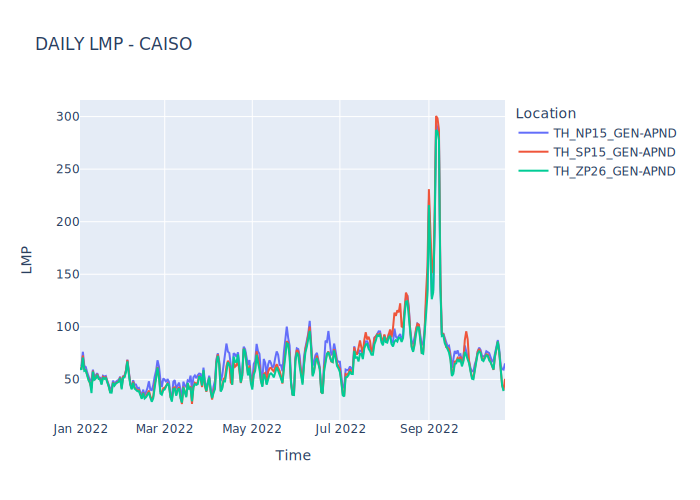

In [42]:
daily_lmp = lmp_df.set_index("Time").groupby("Location").resample("1D").mean().reset_index()[1:-1]
fig = px.line(daily_lmp, x="Time", y="LMP", title="DAILY LMP - CAISO", color="Location")
fig.show("svg")

## Gas Prices

CAISO also publish information about gas prices and greenhouse gas allownces that we will download

In [43]:
start = start = pd.Timestamp("Jan 01, 2022").normalize()
end = pd.Timestamp.now().normalize()

gas_price_df = caiso.get_historical_gas_prices(start=start, end=end, fuel_region_id="FRPGE2GHG")

gas_price_df.to_csv(make_filename(folder+"gas_prices", start, end), index=None)

100%|███████████████████████████████████████████| 10/10 [00:57<00:00,  5.71s/it]


In [45]:
start = start = pd.Timestamp("Jan 01, 2022").normalize()
end = pd.Timestamp.now().normalize()

ghg_df = caiso.get_historical_ghg_allowance(start=start, end=end)

ghg_df.to_csv(make_filename(folder+"ghg_allowance", start, end), index=None)

100%|███████████████████████████████████████████| 10/10 [00:53<00:00,  5.31s/it]
